# Spaceship Titanic Competition

This is my entry for the spaceship titanic competition, the task is to predict if a passanger was transported to an alternate dimension after the ship's collision with a spacetime anomaly

Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, precision_score, recall_score

### Data dictionary

- **PassengerId** - A unique Id for each passenger. Each Id takes the form ```gggg_pp``` where ```gggg``` indicates a group the passenger is travelling with and ```pp``` is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
# List all the files
for dirpath, dirnames, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

../data/raw\sample_submission.csv
../data/raw\test.csv
../data/raw\train.csv
../data/stg\train_stg.csv


In [3]:
# Another way 
os.listdir('../data/raw/')

['sample_submission.csv', 'test.csv', 'train.csv']

let's load the data

In [4]:
df = pd.read_csv('../data/raw/train.csv')
# df = pd.read_csv('../data/train.csv', dtype_backend='pyarrow')

## EDA - Exploratory Data Analisis

Check the data 


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
print(df.shape)

(8693, 14)


In [10]:
df['PassengerId'] = pd.Series(df['PassengerId'], dtype='String[pyarrow]')

In [11]:
type(df['PassengerId'])

pandas.core.series.Series

In [12]:
df['HomePlanet'] = pd.Series(df['HomePlanet'], dtype='String[pyarrow]')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   PassengerId   8693 non-null   string[pyarrow]
 1   HomePlanet    8492 non-null   string[pyarrow]
 2   CryoSleep     8476 non-null   object         
 3   Cabin         8494 non-null   object         
 4   Destination   8511 non-null   object         
 5   Age           8514 non-null   float64        
 6   VIP           8490 non-null   object         
 7   RoomService   8512 non-null   float64        
 8   FoodCourt     8510 non-null   float64        
 9   ShoppingMall  8485 non-null   float64        
 10  Spa           8510 non-null   float64        
 11  VRDeck        8505 non-null   float64        
 12  Name          8493 non-null   object         
 13  Transported   8693 non-null   bool           
dtypes: bool(1), float64(6), object(5), string[pyarrow](2)
memory usage: 925.

Check for null values in the dataframe 

In [14]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Check how many people were transported into another dimension

In [15]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

Check correlation between features 

In [16]:
df.corr(numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [17]:
df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

How many people that were in cryosleep got transported? 

In [18]:
df_grouped_cryo = df['CryoSleep'].loc[df['Transported'] == 1].value_counts()
df_grouped_cryo

CryoSleep
True     2483
False    1789
Name: count, dtype: int64

Let's see this as a graph

Text(0.5, 1.0, 'Passengers grouped by cryo sleep that got transported')

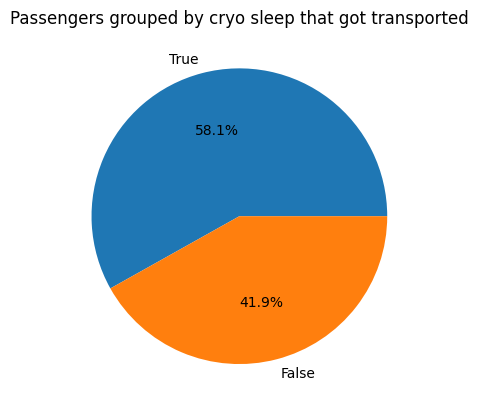

In [19]:
fig, ax = plt.subplots(1, 1)
ax.pie(df_grouped_cryo, labels=['True', 'False'], autopct='%1.1f%%')
ax.set_title('Passengers grouped by cryo sleep that got transported')

Text(0.5, 1.0, 'Passengers grouped by cryo sleep that got transported')

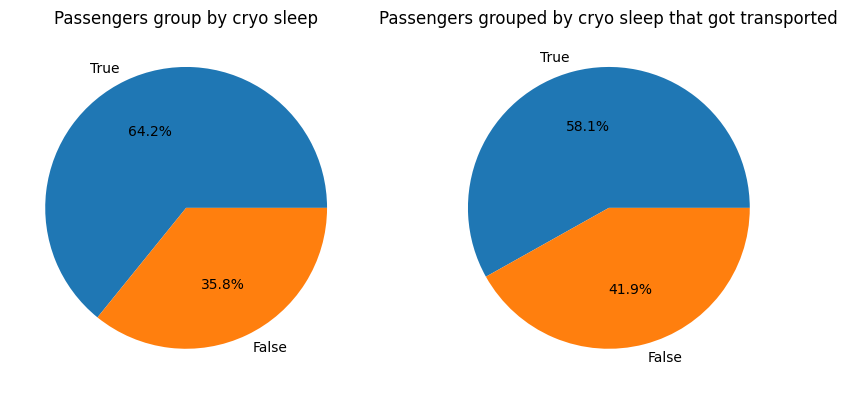

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].pie(df.groupby('CryoSleep').count()['PassengerId'], labels=df_grouped_cryo.index, autopct='%.1f%%')
ax[0].set_title('Passengers group by cryo sleep')
ax[1].pie(df_grouped_cryo, labels=df_grouped_cryo.index, autopct='%.1f%%')
ax[1].set_title('Passengers grouped by cryo sleep that got transported')

Let's do the same but grouping by home planet

In [21]:
# Here i'm using another way of filtering and goruping
df_grouped_home = df.loc[df['Transported'] == 1].groupby('HomePlanet').count()['PassengerId']
df_grouped_home

HomePlanet
Earth     1951
Europa    1404
Mars       920
Name: PassengerId, dtype: int64[pyarrow]

Text(0.5, 1.0, 'Passengers grouped by home planet who got transported')

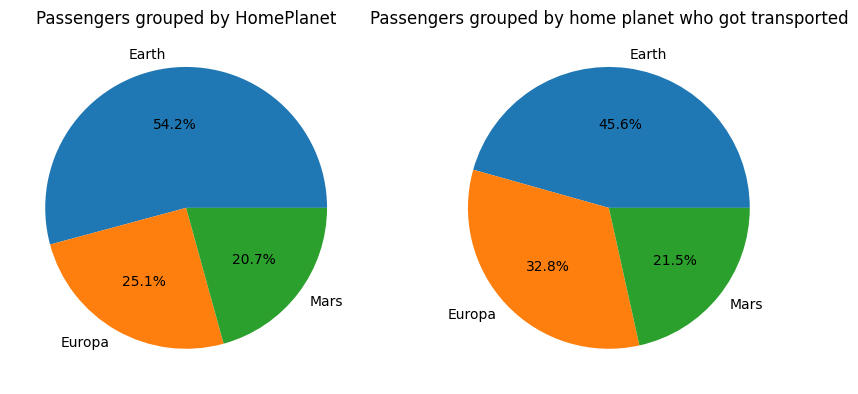

In [22]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))
ax[0].pie(df.groupby('HomePlanet').count()['PassengerId'], labels=df_grouped_home.index, autopct='%.1f%%')
ax[0].set_title('Passengers grouped by HomePlanet')
ax[1].pie(df_grouped_home, labels=df_grouped_home.index, autopct='%.1f%%')
ax[1].set_title('Passengers grouped by home planet who got transported')

In [23]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [24]:
df['Destination'].loc[df['Transported'] == True ].value_counts()

Destination
TRAPPIST-1e      2787
55 Cancri e      1098
PSO J318.5-22     401
Name: count, dtype: int64

Text(0.5, 1.0, 'Passengers grouped by destination who got transported')

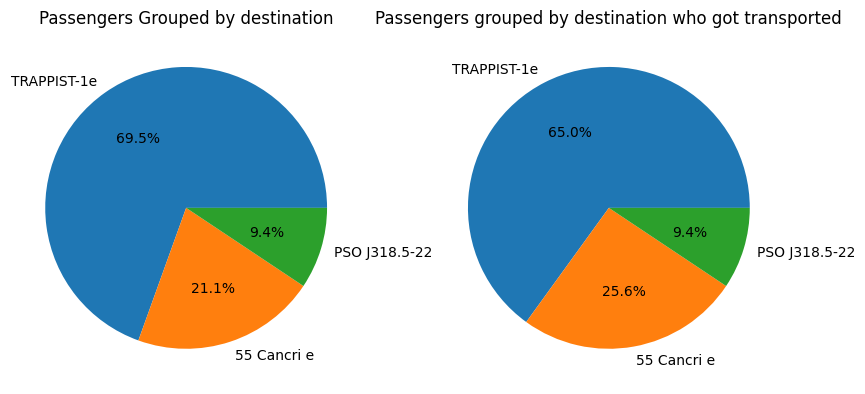

In [25]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))
ax[0].pie(df['Destination'].value_counts(), labels=df['Destination'].value_counts().index,
                                                    autopct='%.1f%%')
ax[0].set_title('Passengers Grouped by destination')
ax[1].pie(df['Destination'].loc[df['Transported'] == True ].value_counts(),
                        labels=df['Destination'].value_counts().index, autopct='%1.1f%%',)
ax[1].set_title('Passengers grouped by destination who got transported')

In [26]:
df['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

Splitting the Cabin in order to get *deck* / *num* / *side*

In [27]:
# Using python's list split method
str(df['Cabin'][0]).split('/')

['B', '0', 'P']

In [28]:
# Using Pandas's string Series split method
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


Text(0.5, 1.0, 'Passengers grouped by VIP class who got transported')

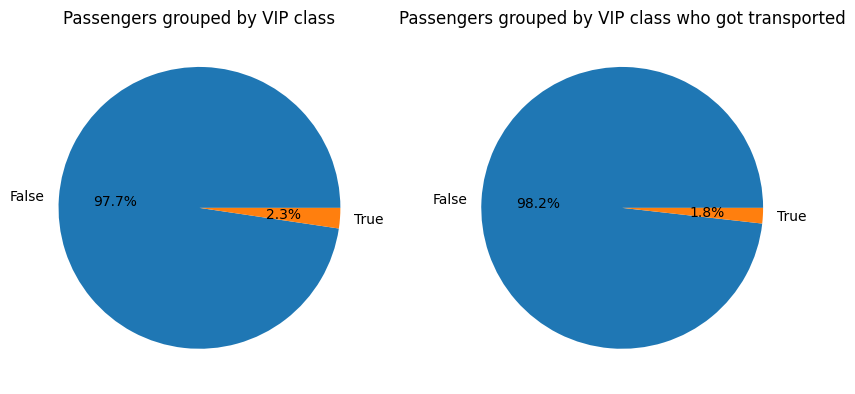

In [29]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))
ax[0].pie(df['VIP'].value_counts(), labels=df['VIP'].value_counts().index,
                                                    autopct='%.1f%%')
ax[0].set_title('Passengers grouped by VIP class')
ax[1].pie(df['VIP'].loc[df['Transported'] == True ].value_counts(),
                        labels=df['VIP'].value_counts().index, autopct='%1.1f%%',)
ax[1].set_title('Passengers grouped by VIP class who got transported')

In [30]:
def plothist(df_series: str) -> None:
    fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(11, 9))
    ax0.hist(df[df_series])
    ax0.set_title(f'Passengers grouped by {df_series} class')
    ax1.hist(df[df_series].loc[df['Transported'] == True])
    ax1.set_title(f'Passengers grouped by {df_series} class who got transported')    

In [64]:
def plotpie(df_series: str) -> None:
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize = (12,5))
    ax0.pie(df[df_series].value_counts(), labels=df[df_series].value_counts().index,
                                                        autopct='%.1f%%')
    ax0.set_title(f'Passengers grouped by {df_series} class')
    ax1.pie(df[df_series].loc[df['Transported'] == True ].value_counts(),
                            labels=df[df_series].value_counts().index, autopct='%1.1f%%',)
    ax1.set_title(f'Passengers grouped by {df_series} class who got transported')

In [32]:
df['Luxury'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [33]:
df['Luxury'].describe()

count     7785.000000
mean      1484.601541
std       2845.288241
min          0.000000
25%          0.000000
50%        736.000000
75%       1486.000000
max      35987.000000
Name: Luxury, dtype: float64

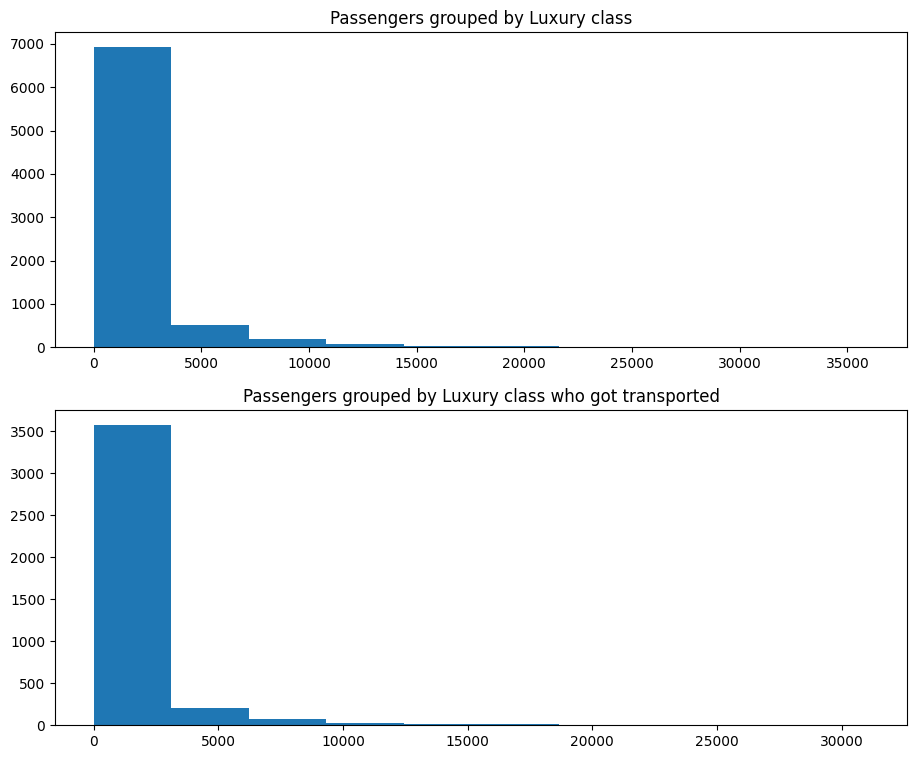

In [34]:
plothist('Luxury')

In [35]:
df.loc[pd.isna(df['Luxury'])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Luxury
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S,NaN
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,B,1,P,NaN
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,F,3,P,NaN
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,E,0,S,NaN
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,E,0,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,9221_01,Earth,True,G/1497/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,NaN,Elicey Beachez,False,G,1497,P,NaN
8643,9222_01,Mars,True,F/1784/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,NaN,0.0,Carves Chate,True,F,1784,S,NaN
8665,9247_01,Earth,True,G/1491/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,NaN,Phia Cleang,False,G,1491,S,NaN
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True,E,597,P,NaN


In [36]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Luxury
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0


In [37]:
df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [38]:
df['Age'].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

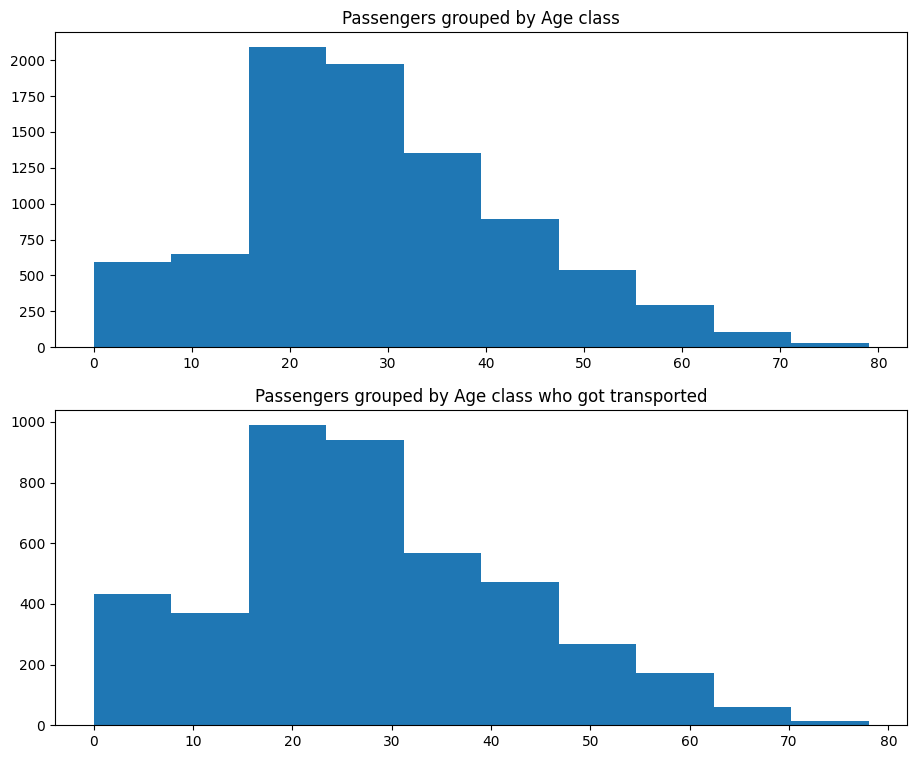

In [39]:
plothist('Age')

In [40]:
df['Side'].value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

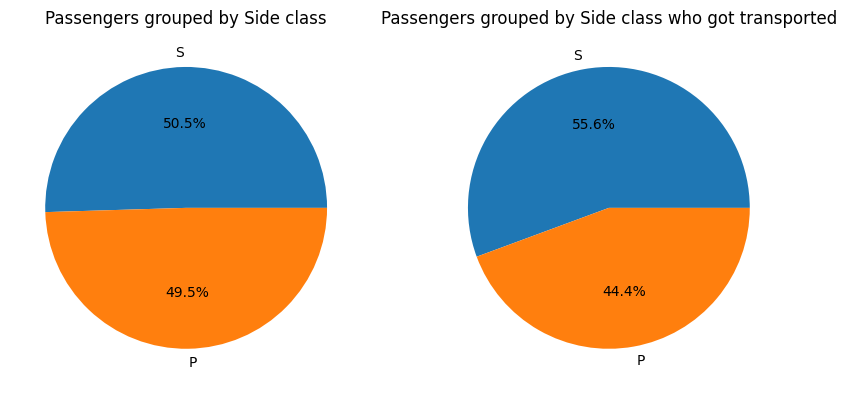

In [41]:
plotpie('Side')

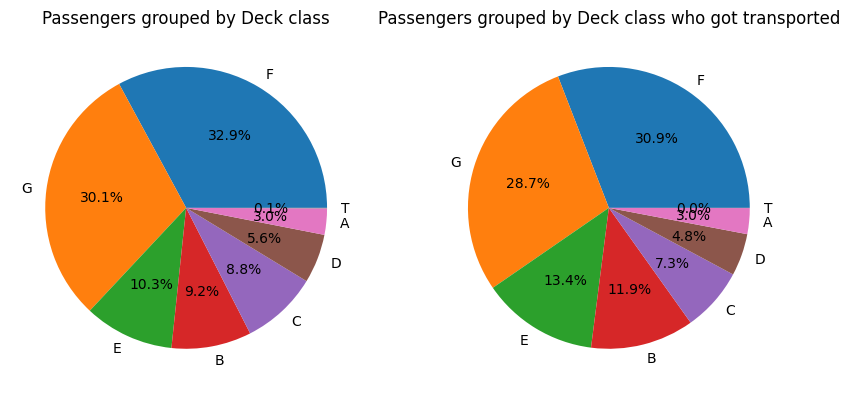

In [42]:
plotpie('Deck')

In [43]:
df['Num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Num
Non-Null Count  Dtype 
--------------  ----- 
8494 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


In [44]:
df['Num'].describe()

count     8494
unique    1817
top         82
freq        28
Name: Num, dtype: object

In [45]:
df['Num'] = pd.Series(df['Num'], dtype='float')

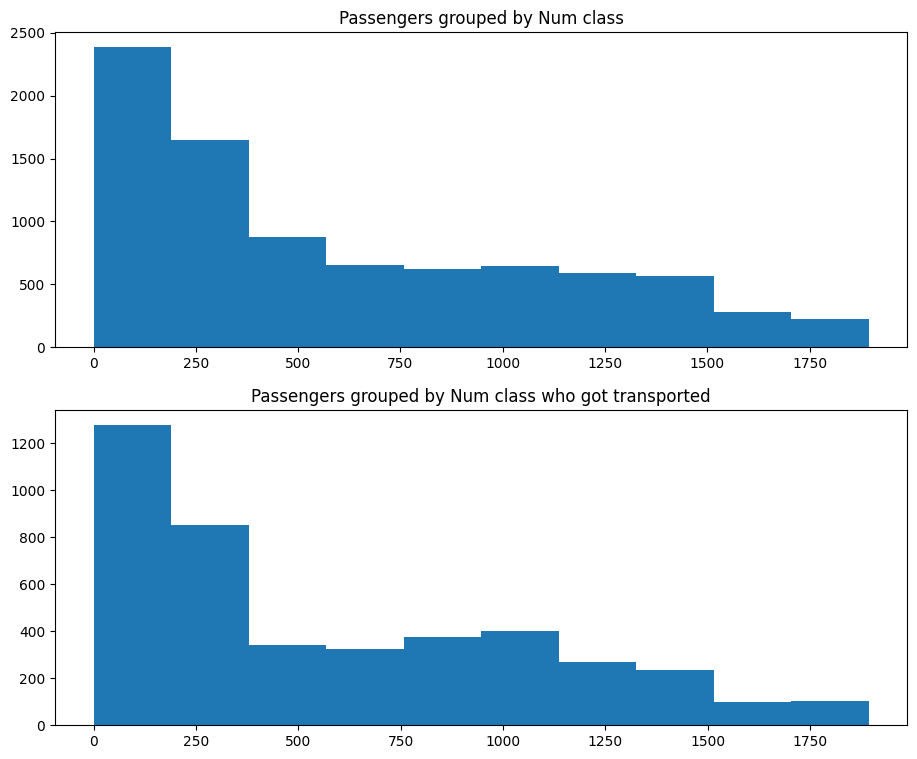

In [46]:
plothist('Num')

In [47]:
df['Name'].head(20)

0        Maham Ofracculy
1           Juanna Vines
2          Altark Susent
3           Solam Susent
4      Willy Santantines
5      Sandie Hinetthews
6     Billex Jacostaffey
7     Candra Jacostaffey
8          Andona Beston
9         Erraiam Flatic
10        Altardr Flatic
11         Wezena Flatic
12          Berers Barne
13        Reney Baketton
14       Elle Bertsontry
15         Justie Pooles
16           Flats Eccle
17       Carry Hughriend
18            Alus Upead
19         Lyde Brighttt
Name: Name, dtype: object

In [48]:
df['Group'] = df['PassengerId'].str.split('_', expand=True)[0]

In [49]:
type(df['Group'].value_counts())

pandas.core.series.Series

In [50]:
pd.DataFrame(data={'Group':df['Group'].value_counts().index})

,Group
0,0984
1,4005
2,4256
3,4498
4,5133
...,...
6212,9270
6213,9274
6214,9276
6215,9278


In [51]:
pd.DataFrame(df['Group'].value_counts()).reset_index()

,Group,count
0,0984,8
1,4005,8
2,4256,8
3,4498,8
4,5133,8
...,...,...
6212,9270,1
6213,9274,1
6214,9276,1
6215,9278,1


In [52]:
df_group = pd.DataFrame(df['Group'].value_counts()).reset_index()
df_group = df_group.rename(columns={'count': 'GroupSize'})
df_group.tail()

,Group,GroupSize
6212,9270,1
6213,9274,1
6214,9276,1
6215,9278,1
6216,9279,1


In [53]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Luxury,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,0.0,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,736.0,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,10383.0,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,5176.0,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,1091.0,0004


In [54]:
df.merge(df_group, how='left', on='Group')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Luxury,Group,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,0.0,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,736.0,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,10383.0,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,5176.0,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,1091.0,0004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P,8536.0,9276,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S,0.0,9278,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S,1873.0,9279,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S,4637.0,9280,2


In [55]:
df = df.merge(df_group, how='left', on='Group')

In [56]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Luxury,Group,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,0.0,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,736.0,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,10383.0,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,5176.0,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,1091.0,0004,1


In [59]:
df['TravelingAlone'] = None
df.loc[df['GroupSize'] > 1, 'TravelingAlone'] = False
df.loc[df['GroupSize'] == 1, 'TravelingAlone'] = True

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   PassengerId     8693 non-null   string[pyarrow]
 1   HomePlanet      8492 non-null   string[pyarrow]
 2   CryoSleep       8476 non-null   object         
 3   Cabin           8494 non-null   object         
 4   Destination     8511 non-null   object         
 5   Age             8514 non-null   float64        
 6   VIP             8490 non-null   object         
 7   RoomService     8512 non-null   float64        
 8   FoodCourt       8510 non-null   float64        
 9   ShoppingMall    8485 non-null   float64        
 10  Spa             8510 non-null   float64        
 11  VRDeck          8505 non-null   float64        
 12  Name            8493 non-null   object         
 13  Transported     8693 non-null   bool           
 14  Deck            8494 non-null   object  

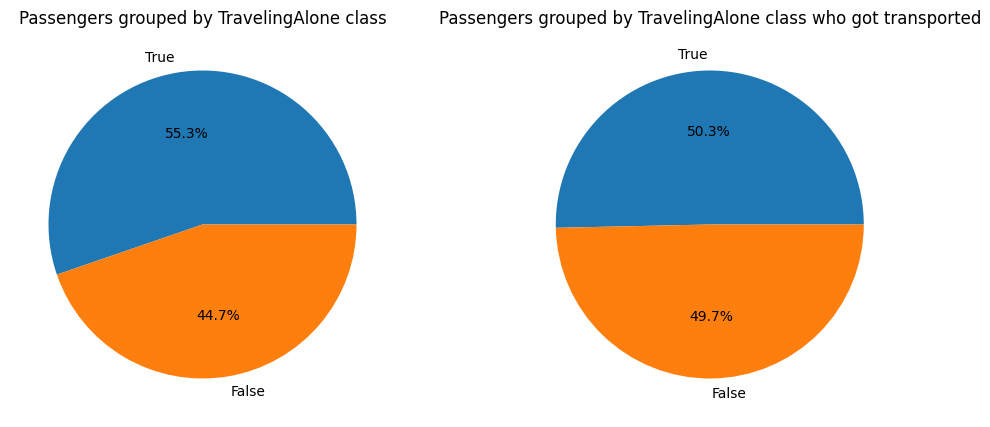

In [65]:
plotpie('TravelingAlone')

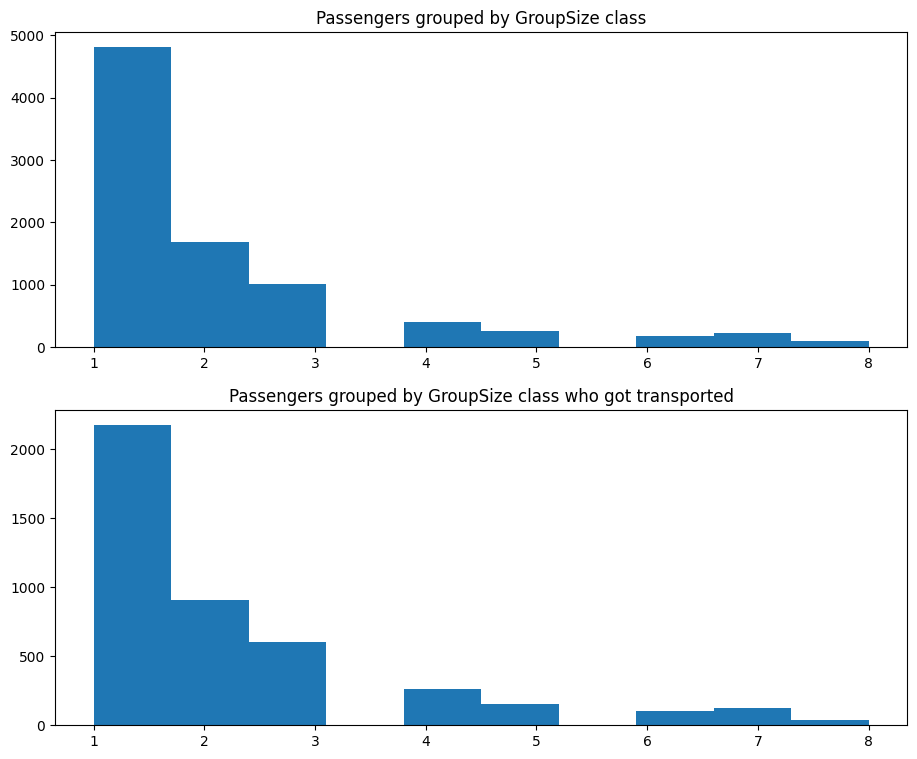

In [67]:
plothist('GroupSize')